In [28]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

from pygam import LinearGAM, s, l
from pygam.datasets import wage


import seaborn as sns
import matplotlib.pyplot as plt

from dmba import stepwise_selection
from dmba import AIC_score

from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.tree import plot_tree
from dtreeviz.trees import dtreeviz # remember to load the package
import pydotplus
from sklearn.svm import SVC # "Support vector classifier"
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
import eli5
from sklearn import tree

from sklearn import datasets
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions

from IPython.display import display
from fastai.imports import *
from sklearn import metrics


%matplotlib inline

try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'
    

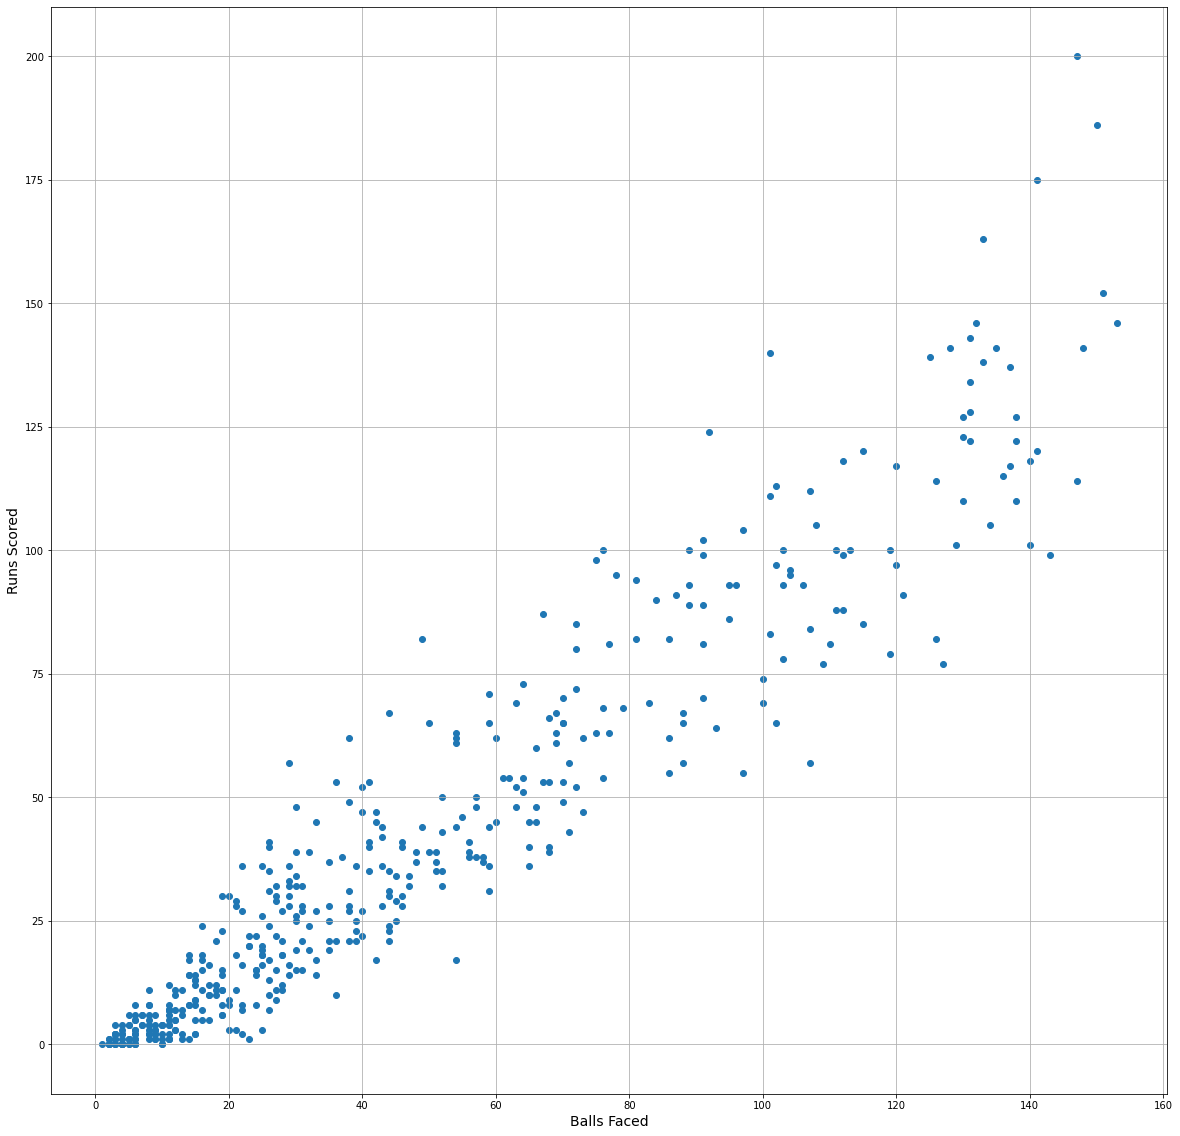

In [29]:
sachinstat = pd.read_csv('C:\Data\TechnologyManagement\MachineLearning\ArchPresentation\SachinODI.csv')
#sachinstat.plot.scatter(x='Ballsfaced', y='Runs')

fig, ax = plt.subplots(figsize=(20, 20))
fig.clf()
SachinStatPredictors = sachinstat[['BallsFaced','StrikeRate']]
SachinStatOutcome = sachinstat['Runs']
plt.scatter(sachinstat['BallsFaced'],sachinstat['Runs'])
plt.grid(True)
plt.xlabel('Balls Faced', fontsize=14)
plt.ylabel('Runs Scored', fontsize=14)
plt.show()


Linear Regression-> Use Balls Faced and Strike Rate as inputs, Try to predict Runs Scored

In [30]:
model = LinearRegression()
model.fit(SachinStatPredictors,SachinStatOutcome)


model.coef_


array([0.86396753, 0.24825702])

In [4]:
model.intercept_

-18.59795636056831

<h5>Has identified the relationship as <h5>
    <br>
C= (Average B)* A + (0.2 * B)-  16
    <br>
Or
    <br>
C = (Average of B) * A + 0.2 * (B- Average of B)

In [31]:
TestData= [[100,100]]
model.predict(TestData)


array([92.62449826])

In [32]:
TestData= [[147,136]]
model.predict(TestData)


array([142.16822472])

In [33]:
TestData= [[50,200]]
model.predict(TestData)


array([74.25182392])

<h5>Linear Regression<h5> 
<ul>
1. Identifies the significant variable(Balls Faced)
    <br>
2. Models to minimize the overall error.. The Error for all predicted and actual values.(Captured the normalized weights <br>correctly)
    <br>
3. Can assign weights to other variables approrpriately to cover above points
    <br>
4. Might not be catching outliers well usually caused by other features(High Strike Rate) or pattern change less number of 
    <br>balls and high strike rate causing more runs than the number of balls.
    </ul>

<h5>Logistic Regression<h5> 
<ul>
Probability ranges from 0 to 1
    <br>
Odds range from 0 to ∞
    <br>
Log odds range from -∞ to +∞
    <br>
I toss the coin 10 times-> Get 5 heads and 5 tails-> Odds 1:1
    <br>
Niyaz knows tricks to get head every time
    <br>
we both toss the coin 10 times-> Get 15 heads and 5 tails-> Odds 3:1
    <br>
Bringing Niyaz improves Odds
    <br>
Logistic Regression helps to measure the odds. Predicted outcome has to be binary (1,0)
    <br>
<ul>

In [34]:
from sklearn.linear_model import LogisticRegression
SachinStatPredictors = sachinstat[['BallsFaced','StrikeRate']]
SachinStatOutcome = sachinstat['CenturyInd']
SachinStatOutcome



0      0
1      0
2      0
3      0
4      0
      ..
446    1
447    1
448    1
449    1
450    1
Name: CenturyInd, Length: 451, dtype: int64

In [36]:
# Create an instance and fit the model 
model = LogisticRegression()
result =model.fit(SachinStatPredictors,SachinStatOutcome)
TestData= [[100,100]]
CenturyIndProb=model.predict_proba(TestData)
CenturyIndProb



array([[0.72405337, 0.27594663]])

In [37]:
TestData= [[50,200]]
CenturyIndProb=model.predict_proba(TestData)
CenturyIndProb


array([[7.88710989e-04, 9.99211289e-01]])

In [38]:
TestData= [[99,99]]
CenturyIndProb=model.predict_proba(TestData)
CenturyIndProb

array([[0.8115222, 0.1884778]])

In [28]:
print('intercept:', model.intercept_)
print('coefficient:', model.coef_[0])


intercept: [-22.64232408]
coefficient: [0.1403467  0.07967114]


<h5>Decision Tree<h5>
    <br> Driven by Impurity Measure : Gini and other similar measures
   

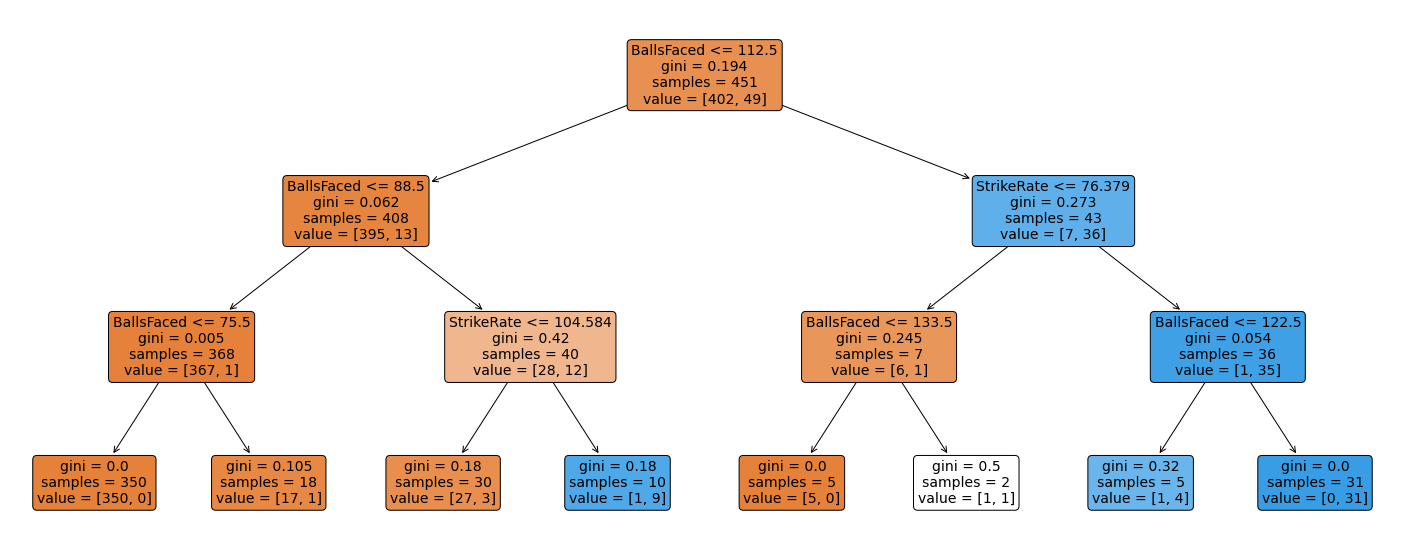

In [39]:

clf = DecisionTreeClassifier(max_depth=3)
SachinStatPredictors = sachinstat[['BallsFaced','StrikeRate']]
SachinStatOutcome = sachinstat['CenturyInd']
model = clf.fit(SachinStatPredictors,SachinStatOutcome)
plt.figure(figsize=(25,10))
viz=plot_tree(clf, 
              feature_names=['BallsFaced','StrikeRate'], 
              filled=True, 
              rounded=True, 
              fontsize=14)   

#viz = dtreeviz(clf, 
#               x_data=SachinStatPredictors,
#               y_data=SachinStatOutcome,
#               target_name='CenturyInd',
#               feature_names=['BallsFaced','StrikeRate'], 
#               class_names=['CenturyInd'], 
#               title="Decision Tree -Sachin ODI Stat")
#viz





<h6> Random Forest <H6>
    <ul>
        Subset of the data is taken for every tree
        <br>
        Features selected can also vary
        <ul

In [40]:
model = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)
#
# Fit the model

#
SachinStatPredictors = sachinstat[['BallsFaced','StrikeRate']]
SachinStatOutcome = sachinstat['CenturyInd']
model.fit(SachinStatPredictors, SachinStatOutcome)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

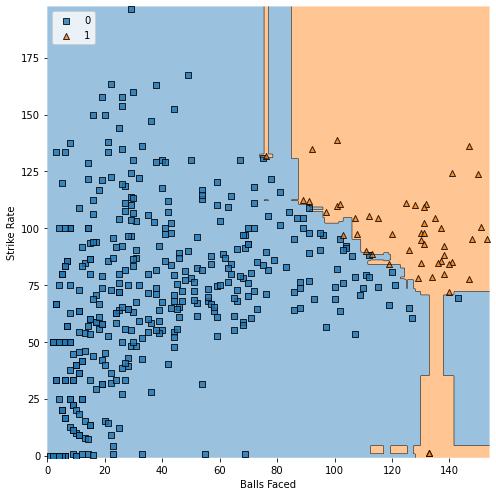

In [58]:
 
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(SachinStatPredictors.to_numpy(), SachinStatOutcome.to_numpy(), clf=model)
plt.xlabel('Balls Faced')
plt.ylabel('Strike Rate')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<h6> Boosting<h6>

In [14]:
class DecisionTree():
    def __init__(self, x, y, idxs = None, min_leaf=2):
        if idxs is None: idxs=np.arange(len(y))
        self.x,self.y,self.idxs,self.min_leaf = x,y,idxs,min_leaf
        self.n,self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in range(self.c): self.find_better_split(i)
        if self.score == float('inf'): return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        self.lhs = DecisionTree(self.x, self.y, self.idxs[lhs])
        self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs])

    def find_better_split(self, var_idx):
        x,y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf')
    
    def __repr__(self):
        s = f'n: {self.n}; val:{self.val}'
        if not self.is_leaf:
            s += f'; score:{self.score}; split:{self.split}; var:{self.split_name}'
        return s

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

In [15]:
def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)


In [18]:
x = np.arange(0,451)
x = pd.DataFrame({'x':x})
y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))
y = y[:,None]

In [19]:
sachinstat = pd.read_csv('C:\Data\TechnologyManagement\MachineLearning\ArchPresentation\SachinODI.csv')
#sachinstat.plot.scatter(x='Ballsfaced', y='Runs')



In [20]:
x['x']=sachinstat[['BallsFaced']]
x.head()

,x
0,1
1,2
2,2
3,2
4,2


In [21]:
y=sachinstat['Runs']
y = y[:,None]

<ipython-input-21-d701052c5938>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,None]


In [22]:
x.shape, y.shape


((451, 1), (451, 1))

<ipython-input-41-d74bf6162611>:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (13,2.5))


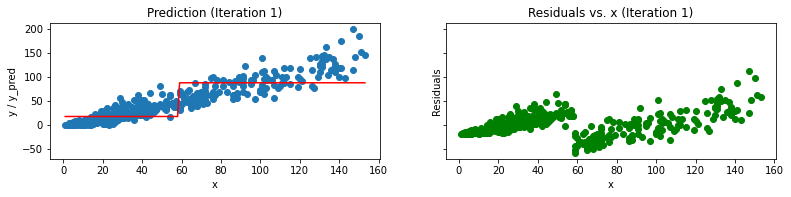

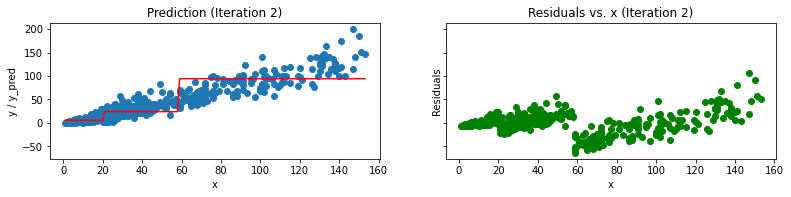

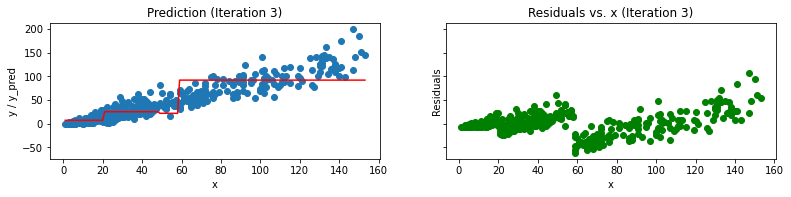

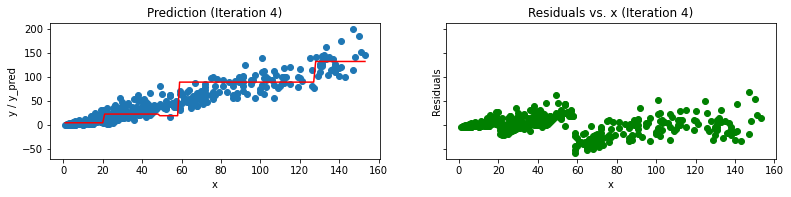

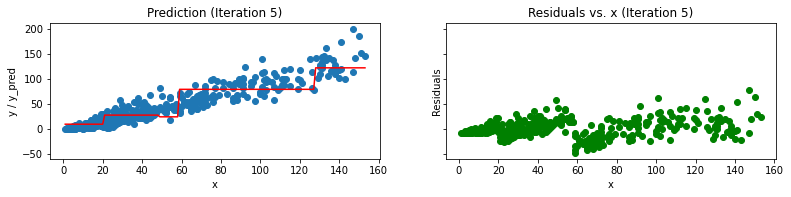

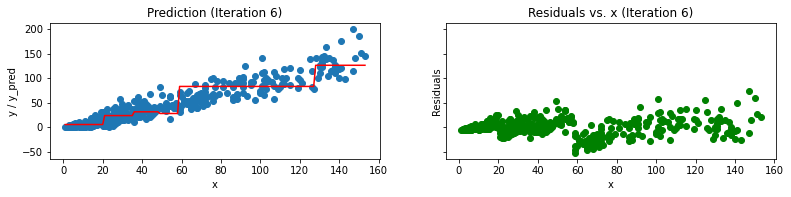

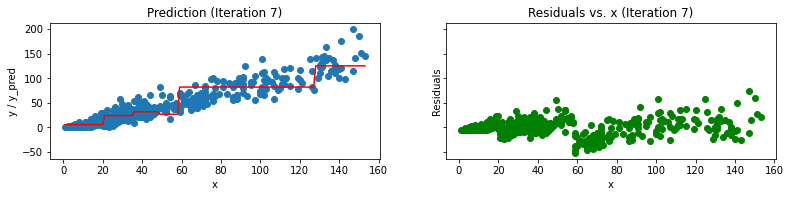

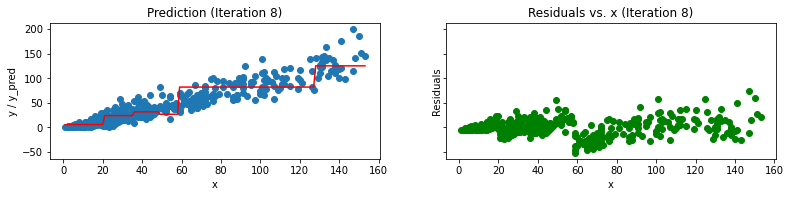

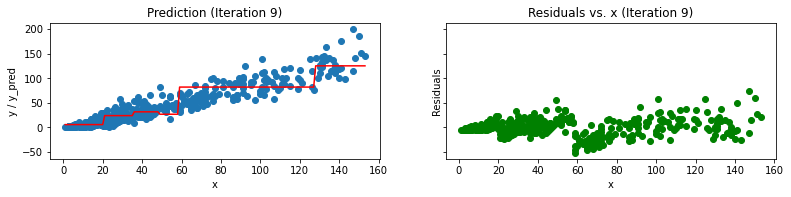

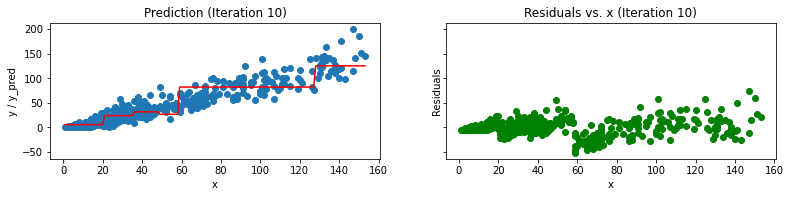

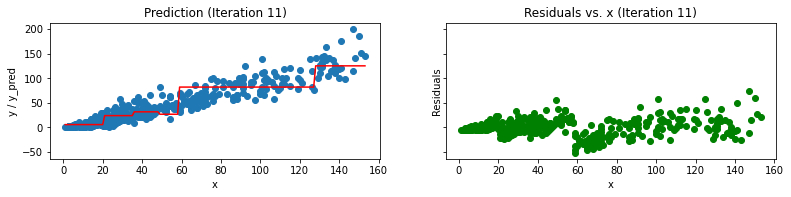

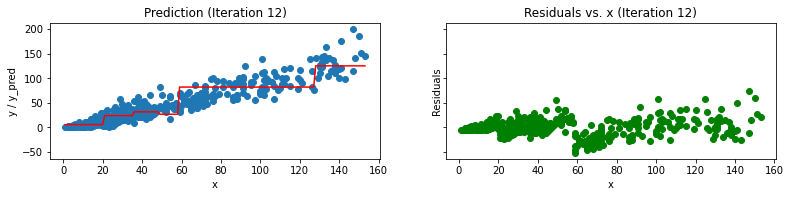

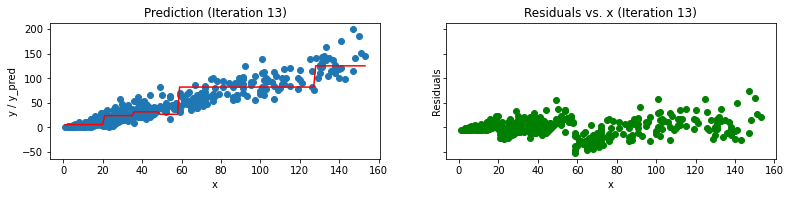

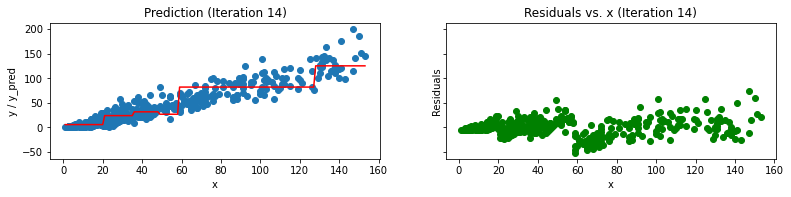

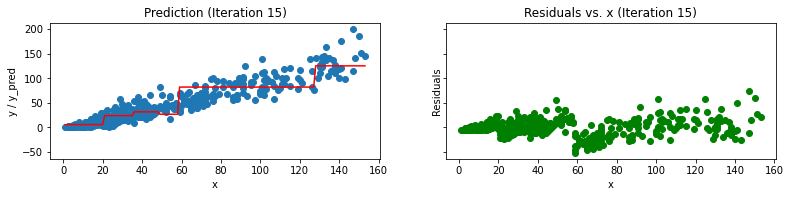

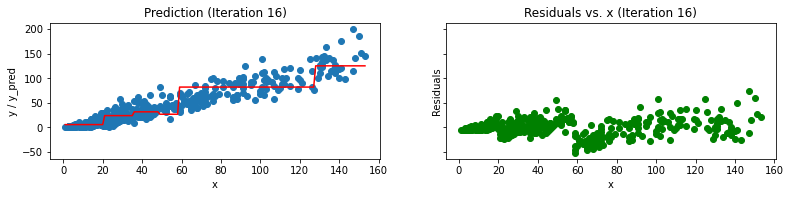

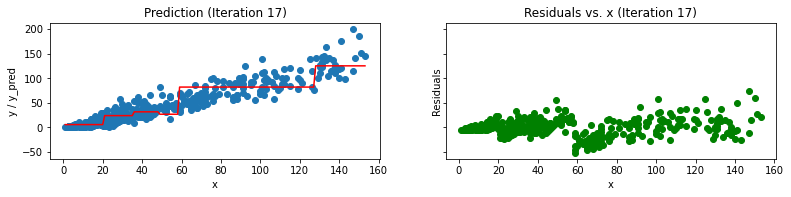

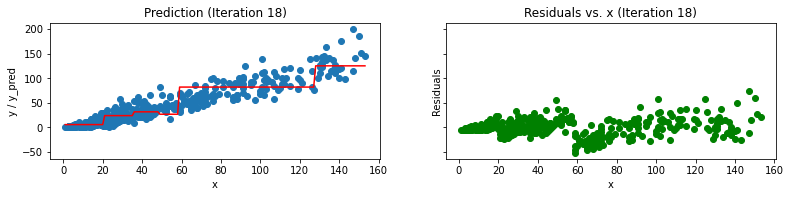

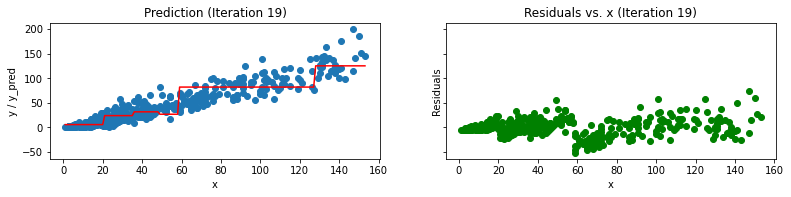

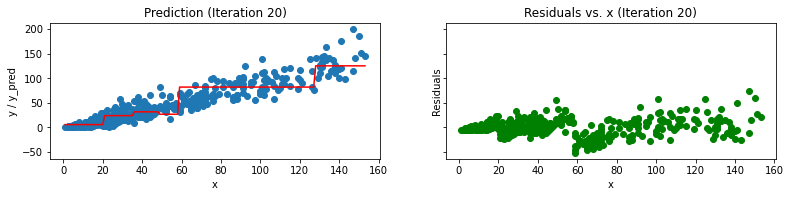

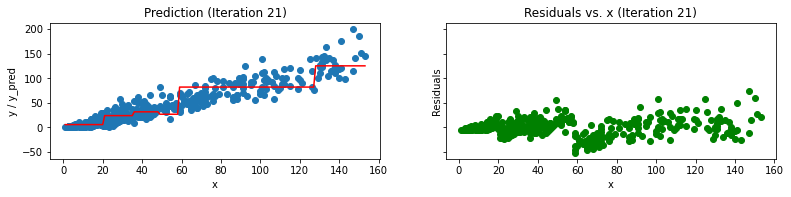

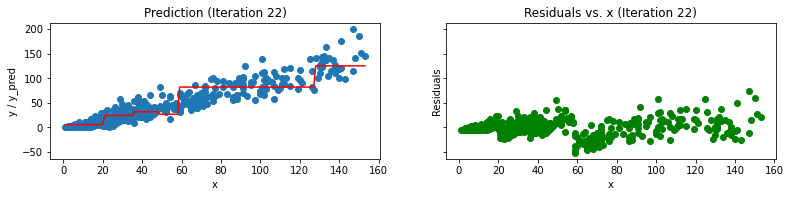

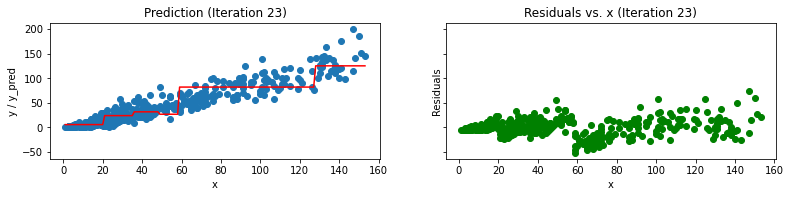

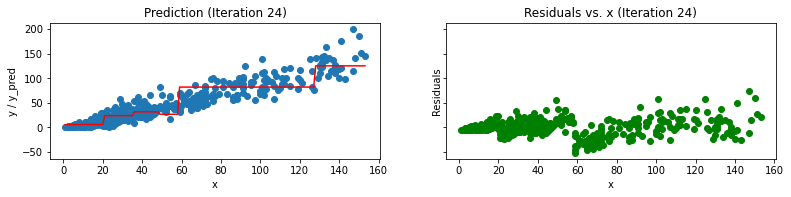

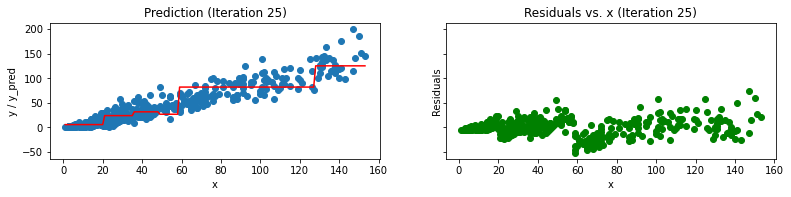

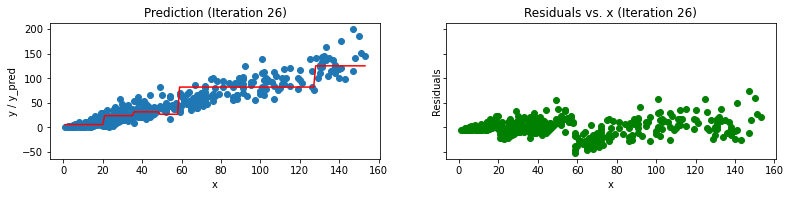

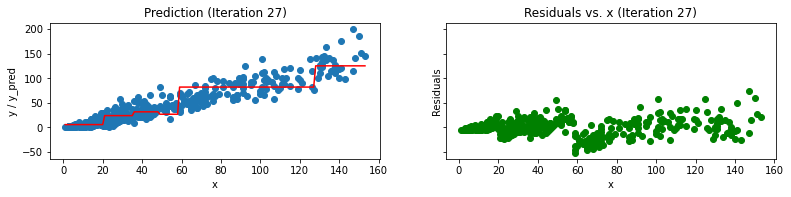

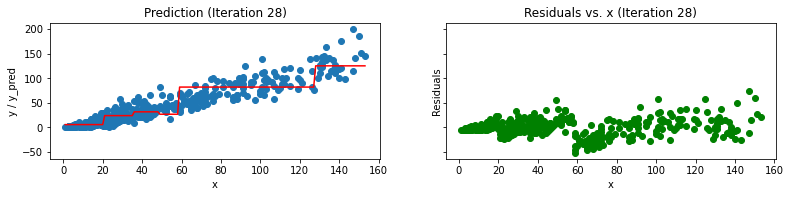

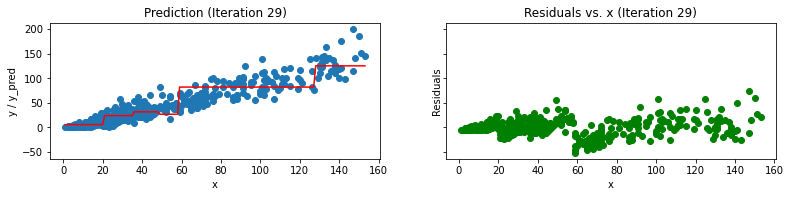

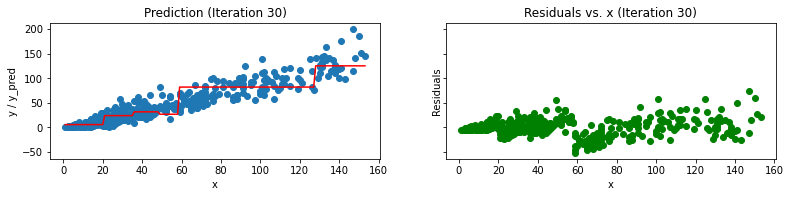

In [41]:
xi = x
 # initialization of input
yi = y # initialization of target
# x,y --> use where no need to change original y
ei = 0 # initialization of error
n = len(yi)  # number of rows
predf = 0 # initial prediction 0

for i in range(30): # like n_estimators
    tree = DecisionTree(xi,yi)
    tree.find_better_split(0)
    
    r = np.where(xi == tree.split)[0][0]    
    
    left_idx = np.where(xi <= tree.split)[0]
    right_idx = np.where(xi > tree.split)[0]
    
    predi = np.zeros(n)
    np.put(predi, left_idx, np.repeat(np.mean(yi[left_idx]), r))  # replace left side mean y
    np.put(predi, right_idx, np.repeat(np.mean(yi[right_idx]), n-r))  # right side mean y
    
    predi = predi[:,None]  # make long vector (nx1) in compatible with y
    predf = predf + predi  # final prediction will be previous prediction value + new prediction of residual
    
    ei = y - predf  # needed originl y here as residual always from original y    
    yi = ei # update yi as residual to reloop
    
    
    # plotting after prediction
    xa = np.array(x.x) # column name of x is x 
    order = np.argsort(xa)
    xs = np.array(xa)[order]
    ys = np.array(predf)[order]
    
    #epreds = np.array(epred[:,None])[order]

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (13,2.5))

    ax1.plot(x,y, 'o')
    ax1.plot(xs, ys, 'r')
    ax1.set_title(f'Prediction (Iteration {i+1})')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y / y_pred')

    ax2.plot(x, ei, 'go')
    ax2.set_title(f'Residuals vs. x (Iteration {i+1})')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Residuals')
    
    

<h6> Support Vector Machine <h6>

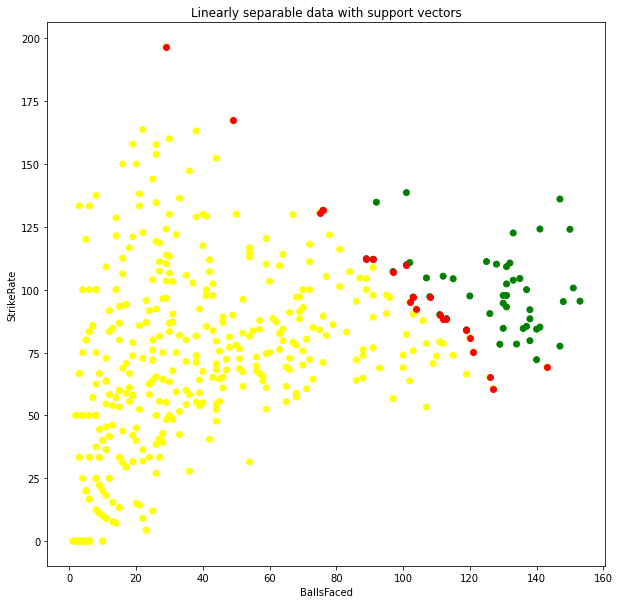

In [24]:
model = SVC(kernel='linear',C=2,gamma=0.0001)
model.fit(SachinStatPredictors, SachinStatOutcome)
support_vectors = model.support_vectors_

fig, ax = plt.subplots(figsize=(10, 10))
fig.clf()
colormap = np.array([ 'yellow', 'g'])
# Visualize support vectors

plt.scatter(sachinstat['BallsFaced'], sachinstat['StrikeRate'],c=colormap[sachinstat['CenturyInd']])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('BallsFaced')
plt.ylabel('StrikeRate')
plt.show()


In [48]:
support_vectors

array([[115.        ,  73.91      ],
       [104.        ,  92.3       ],
       [121.        ,  75.2       ],
       [102.        ,  95.09      ],
       [ 91.        , 108.79      ],
       [112.        ,  88.39      ],
       [106.        ,  87.73      ],
       [143.        ,  69.23      ],
       [ 29.        , 196.55      ],
       [104.        ,  91.34      ],
       [126.        ,  65.07      ],
       [120.        ,  80.83      ],
       [ 75.        , 130.66      ],
       [103.        ,  90.29      ],
       [111.        ,  79.27      ],
       [112.        ,  78.57      ],
       [127.        ,  60.62      ],
       [101.        , 109.9       ],
       [133.        ,   1.03759398],
       [133.        ,   1.22556391],
       [ 76.        , 131.57      ],
       [113.        ,  88.49      ],
       [ 91.        , 112.08      ],
       [119.        ,  84.03      ],
       [102.        , 110.78      ],
       [108.        ,  97.22      ],
       [129.        ,  78.29      ],
 

<h6>KMeans</h6>

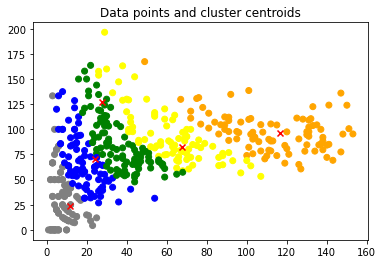

In [25]:
# Specify the number of clusters (3) and fit the data X

# Get the cluster centroids
#print(kmeans.cluster_centers_)
    
# Get the cluster labels
#print(kmeans.labels_)
sachinstat = pd.read_csv('C:\Data\TechnologyManagement\MachineLearning\ArchPresentation\SachinODI.csv')
SachinStatPredictors = sachinstat[['BallsFaced','StrikeRate','Runs']]
SachinStatOutcome = sachinstat['CenturyInd']
SachinStatPredictors=SachinStatPredictors.merge(SachinStatOutcome.to_frame(), left_index=True, right_index=True)
SachinStatPredictors['Branch']=pd.qcut(SachinStatPredictors['Runs'], 
                             q = 5, labels = False)
SachinStatPredictors=SachinStatPredictors.astype({"Branch":int})
# Plotting the cluster centers and the data points on a 2D planeViolet
colormap = np.array(['Gray', 'Blue', 'Green','Yellow','Orange','Violet'])
kmeans = KMeans(n_clusters=5, random_state=0).fit(SachinStatPredictors)
plt.scatter(SachinStatPredictors['BallsFaced'], SachinStatPredictors['StrikeRate'],c = colormap[SachinStatPredictors['Branch']])
                                                                                             
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()
#print(kmeans.cluster_centers_[:, 0]* kmeans.cluster_centers_[:, 1]/100)



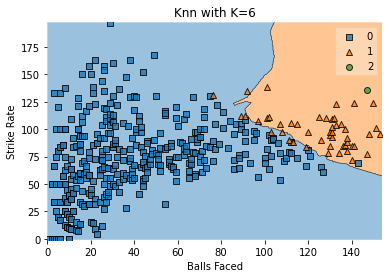

In [26]:
def knn_comparison(data, k):
 x = data[['BallsFaced','StrikeRate']].values
 y = data['Branch'].astype(int).values
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(x, y)
# Plotting decision region
 plot_decision_regions(x, y, clf=clf, legend=1)
# Adding axes annotations
 plt.xlabel('Balls Faced')
 plt.ylabel('Strike Rate')
 plt.title('Knn with K='+ str(k))
 plt.show()


SachinStatPredictors['Branch']=SachinStatPredictors['Runs']/100
SachinStatPredictors=SachinStatPredictors.astype({"Branch":int})
knn_comparison(SachinStatPredictors, 6)

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline



In [42]:

scaler = StandardScaler()
sachinstat = pd.read_csv('C:\Data\TechnologyManagement\MachineLearning\ArchPresentation\SachinODI.csv')
SachinStatPredictors = sachinstat[['BallsFaced','StrikeRate']]
SachinStatOutcome = sachinstat['CenturyInd']
scaler.fit(SachinStatPredictors)
scaled_data = scaler.transform(SachinStatPredictors)

pca = PCA(n_components=1)
pca.fit(scaled_data)
SachinStat_pca = pca.transform(scaled_data)
SachinStat_pca

array([[-2.28655504],
       [-2.26888417],
       [-1.28320592],
       [-1.28320592],
       [-2.26888417],
       [-2.26888417],
       [-2.26888417],
       [-0.93697564],
       [ 0.37726202],
       [-2.25121329],
       [-1.59409446],
       [-0.93697564],
       [-2.25121329],
       [-0.93697564],
       [-2.25121329],
       [-0.93697564],
       [-1.59409446],
       [-1.24786417],
       [-0.26218593],
       [-2.23354241],
       [-2.23354241],
       [-0.75502505],
       [-1.24786417],
       [-2.23354241],
       [-1.74070329],
       [-2.23354241],
       [-2.23354241],
       [-0.63878635],
       [-2.21587154],
       [-0.63878635],
       [-2.21587154],
       [-1.82160024],
       [ 0.14975624],
       [-1.82160024],
       [-1.82160024],
       [-1.54108184],
       [-2.19820066],
       [-2.19820066],
       [-0.5554036 ],
       [-1.86964125],
       [-2.19820066],
       [-1.21252242],
       [-1.54108184],
       [-1.86964125],
       [-0.22684418],
       [ 0